In [762]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, t

In [763]:
dfs = pd.read_excel("DataSetVentes.xlsx", sheet_name=None)

In [764]:
df_pants_sales = dfs["Pants sales"]
print(df_pants_sales.head())

        Date  S/ billion Yuan  X4/ billion  X8/ 10\nmillion  X9/ 100 thousand  \
0 2016-05-01             2.23         3.84             1.48              1.12   
1 2016-06-01             2.14         3.85             1.44              1.09   
2 2016-07-01             1.72         3.30             1.19              0.97   
3 2016-08-01             1.46         2.81             1.00              0.87   
4 2016-09-01             1.86         3.05             1.17              1.02   

   X10/ million  
0          1.19  
1          1.16  
2          1.03  
3          0.93  
4          1.07  


In [765]:
print(df_pants_sales[df_pants_sales.duplicated()])

Empty DataFrame
Columns: [Date, S/ billion Yuan, X4/ billion, X8/ 10
million, X9/ 100 thousand, X10/ million]
Index: []


In [766]:
df_sweater_sales = dfs["Sweater sales"]
print(df_sweater_sales.head())

        Date  S/ billion Yuan  X4/ billion  X8/ 10\nmillion  X9/ 100 thousand  \
0 2016-05-01             0.63         1.11             3.66              4.71   
1 2016-06-01             0.46         0.82             2.72              3.91   
2 2016-07-01             0.42         0.81             2.70              3.55   
3 2016-08-01             0.91         1.86             6.60              5.33   
4 2016-09-01             1.90         3.78            12.69              8.13   

   X10/ million  
0          5.87  
1          4.97  
2          4.69  
3          7.20  
4         10.92  


In [767]:
print(df_sweater_sales[df_sweater_sales.duplicated()])

Empty DataFrame
Columns: [Date, S/ billion Yuan, X4/ billion, X8/ 10
million, X9/ 100 thousand, X10/ million]
Index: []


In [768]:
df_dress_sales = dfs["Dress sales."]
print(df_dress_sales.head())

        Date  S/ billion Yuan  X4/ billion  X8/ 10\nmillion  X9/ 100 thousand  \
0 2016-05-01             5.29        11.38             3.03              1.21   
1 2016-06-01             5.66        12.45             3.21              1.24   
2 2016-07-01             4.87        11.70             2.89              1.18   
3 2016-08-01             3.66         8.41             2.06              0.97   
4 2016-09-01             3.35         7.24             1.87              0.92   

   X10/ million  
0          1.98  
1          2.06  
2          1.88  
3          1.59  
4          1.51  


In [769]:
print(df_dress_sales[df_dress_sales.duplicated()])
df_dress_sales = df_dress_sales.drop_duplicates()
print(df_dress_sales[df_dress_sales.duplicated()])

         Date  S/ billion Yuan  X4/ billion  X8/ 10\nmillion  \
20 2017-12-01             1.81         3.94             0.95   

    X9/ 100 thousand  X10/ million  
20               0.5          1.06  
Empty DataFrame
Columns: [Date, S/ billion Yuan, X4/ billion, X8/ 10
million, X9/ 100 thousand, X10/ million]
Index: []


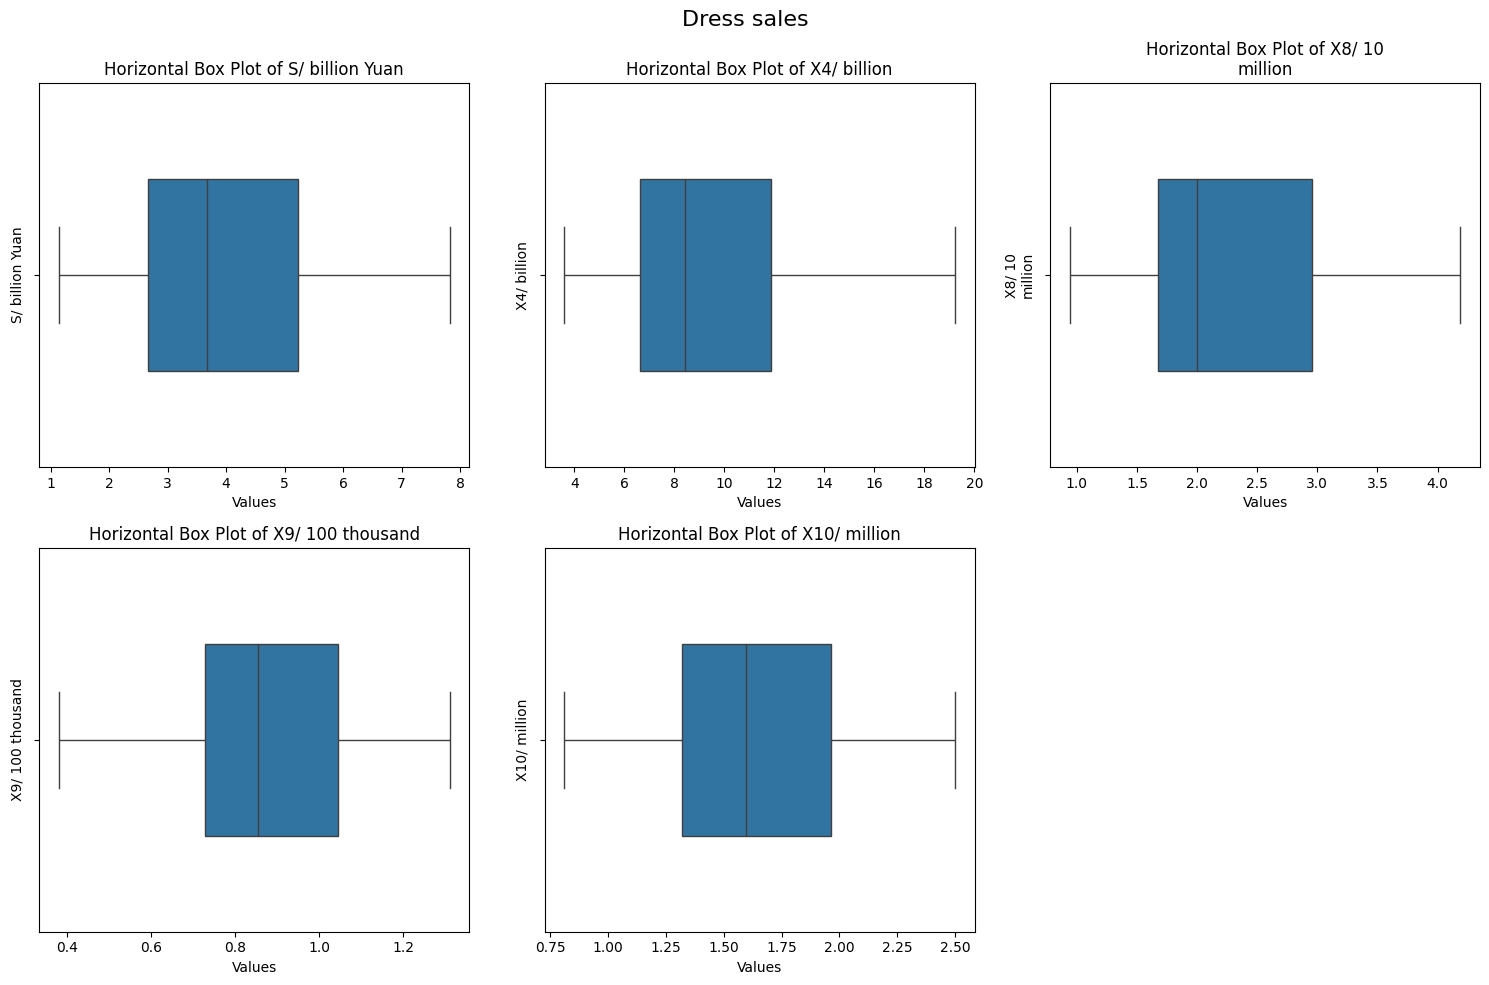

In [770]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Dress sales', fontsize=16)
axes = axes.flatten()

for i, column in enumerate(df_dress_sales.columns[1:7]):
    sns.boxplot(data=df_dress_sales[column], orient='h', ax=axes[i], width=0.5)
    axes[i].set_title(f'Horizontal Box Plot of {column}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel(column)


for j in range(len(df_dress_sales.columns[1:]), 6):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


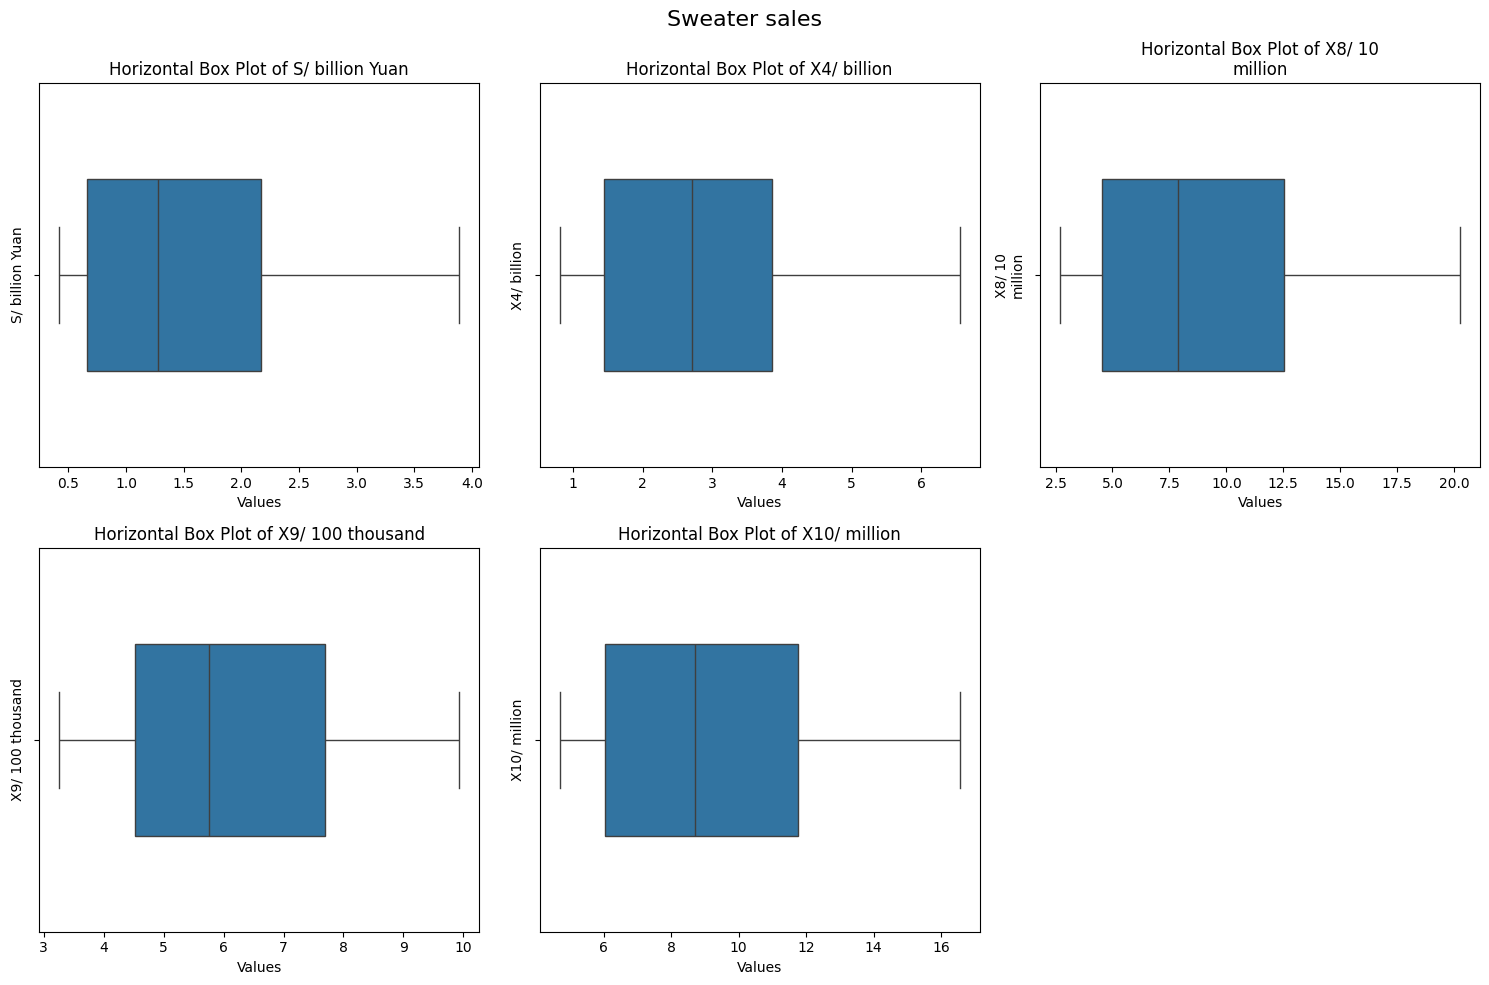

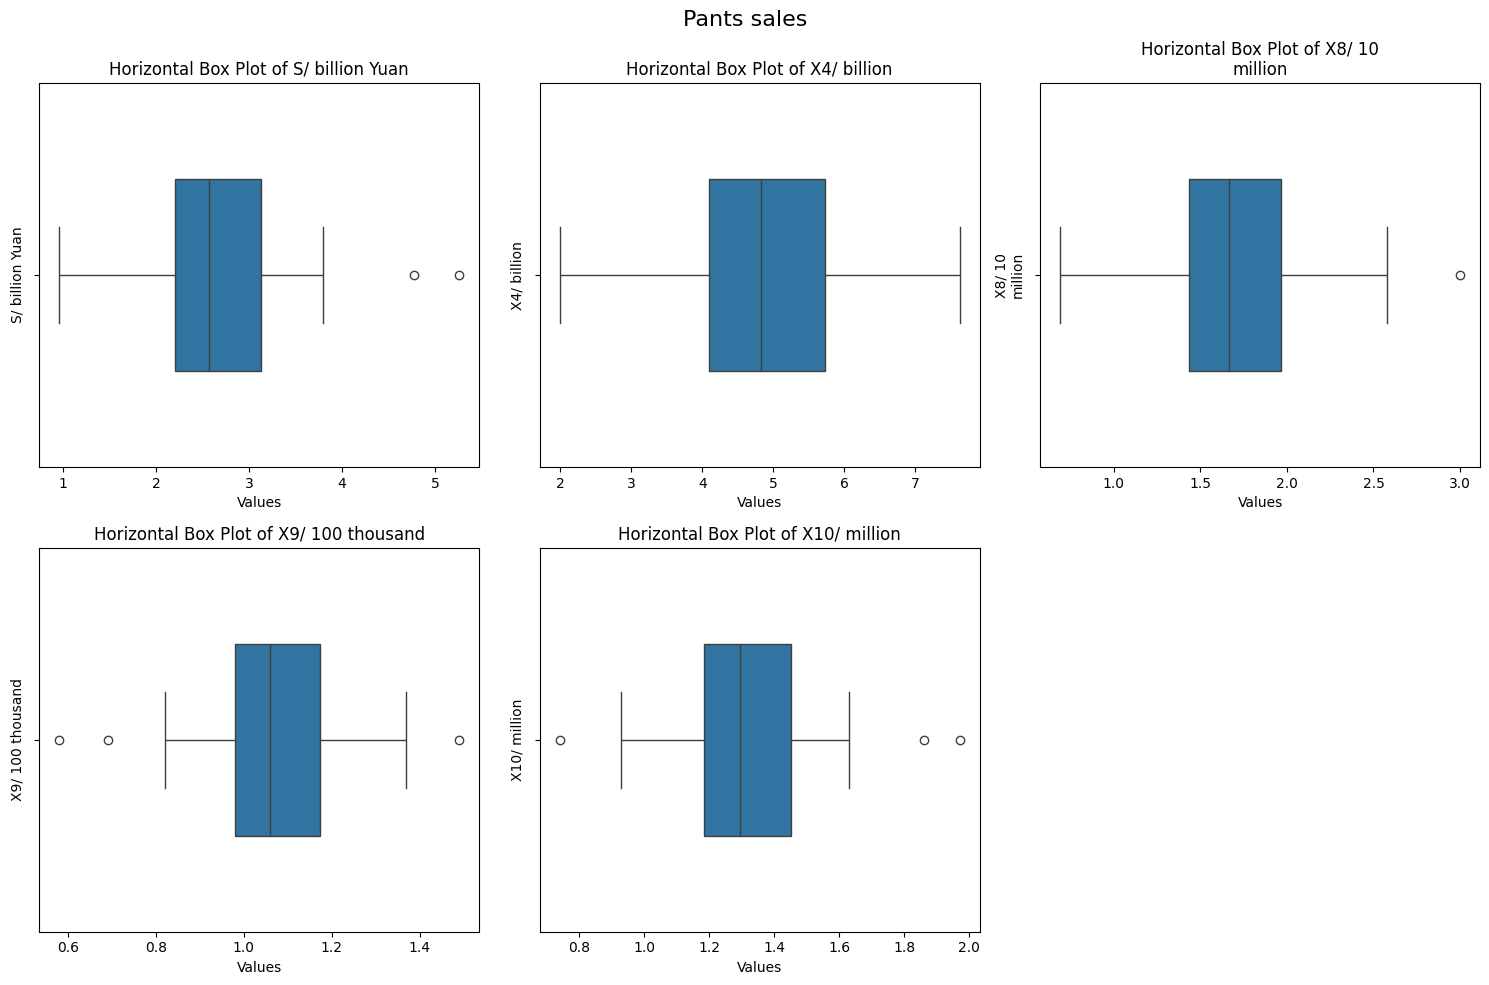

In [771]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Sweater sales', fontsize=16)
axes = axes.flatten()

for i, column in enumerate(df_sweater_sales.columns[1:7]):
    sns.boxplot(data=df_sweater_sales[column], orient='h', ax=axes[i], width=0.5)
    axes[i].set_title(f'Horizontal Box Plot of {column}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel(column)


for j in range(len(df_sweater_sales.columns[1:]), 6):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Pants sales', fontsize=16)
axes = axes.flatten()

for i, column in enumerate(df_pants_sales.columns[1:7]):
    sns.boxplot(data=df_pants_sales[column], orient='h', ax=axes[i], width=0.5)
    axes[i].set_title(f'Horizontal Box Plot of {column}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel(column)


for j in range(len(df_pants_sales.columns[1:]), 6):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

def remove_outliers(df):
    # Create a copy of the DataFrame to avoid modifying the original one
    df_cleaned = df.copy()
    
    # Iterate over each column in the DataFrame
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:  # Apply to numeric columns only

            Q1 = df_cleaned[col].quantile(0.25)
            Q3 = df_cleaned[col].quantile(0.75)
            
            IQR = Q3 - Q1
            

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Filter out the outliers
            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    
    return df_cleaned



In [772]:
df_pants_sales = remove_outliers(df_pants_sales)

In [773]:
df_dress_sales = remove_outliers(df_dress_sales)

In [774]:
df_sweater_sales = remove_outliers(df_sweater_sales)

In [775]:
def center_data(dataframe):
    
    numeric_cols = dataframe.select_dtypes(include=[np.number])
    
    df_centered_numeric = numeric_cols - numeric_cols.mean()
    

    non_numeric_cols = dataframe.select_dtypes(exclude=[np.number])
    df_centered = pd.concat([non_numeric_cols, df_centered_numeric], axis=1)
    
    return df_centered


df_pants_centered = center_data(df_pants_sales)


print(df_pants_centered.head())

        Date  S/ billion Yuan  X4/ billion  X8/ 10\nmillion  X9/ 100 thousand  \
0 2016-05-01        -0.340968     -1.07129        -0.172258          0.054516   
1 2016-06-01        -0.430968     -1.06129        -0.212258          0.024516   
2 2016-07-01        -0.850968     -1.61129        -0.462258         -0.095484   
3 2016-08-01        -1.110968     -2.10129        -0.652258         -0.195484   
4 2016-09-01        -0.710968     -1.86129        -0.482258         -0.045484   

   X10/ million  
0     -0.095161  
1     -0.125161  
2     -0.255161  
3     -0.355161  
4     -0.215161  


In [776]:
df_sweater_centered = center_data(df_sweater_sales)

print(df_pants_centered.head())

        Date  S/ billion Yuan  X4/ billion  X8/ 10\nmillion  X9/ 100 thousand  \
0 2016-05-01        -0.340968     -1.07129        -0.172258          0.054516   
1 2016-06-01        -0.430968     -1.06129        -0.212258          0.024516   
2 2016-07-01        -0.850968     -1.61129        -0.462258         -0.095484   
3 2016-08-01        -1.110968     -2.10129        -0.652258         -0.195484   
4 2016-09-01        -0.710968     -1.86129        -0.482258         -0.045484   

   X10/ million  
0     -0.095161  
1     -0.125161  
2     -0.255161  
3     -0.355161  
4     -0.215161  


In [777]:
df_dress_centered = center_data(df_dress_sales)

print(df_dress_centered.head())

        Date  S/ billion Yuan  X4/ billion  X8/ 10\nmillion  X9/ 100 thousand  \
0 2016-05-01         1.268333     1.618056         0.673333          0.335278   
1 2016-06-01         1.638333     2.688056         0.853333          0.365278   
2 2016-07-01         0.848333     1.938056         0.533333          0.305278   
3 2016-08-01        -0.361667    -1.351944        -0.296667          0.095278   
4 2016-09-01        -0.671667    -2.521944        -0.486667          0.045278   

   X10/ million  
0      0.330833  
1      0.410833  
2      0.230833  
3     -0.059167  
4     -0.139167  


In [778]:
def standardize_data(dataframe):

    numeric_cols = dataframe.select_dtypes(include=[np.number])
    
    df_standardized_numeric = numeric_cols / numeric_cols.std()
    
    non_numeric_cols = dataframe.select_dtypes(exclude=[np.number])
    df_standardized = pd.concat([non_numeric_cols, df_standardized_numeric], axis=1)
    
    return df_standardized

df_pants_standardized = standardize_data(df_pants_centered)

print(df_pants_standardized.head())


        Date  S/ billion Yuan  X4/ billion  X8/ 10\nmillion  X9/ 100 thousand  \
0 2016-05-01        -0.578730    -0.953618        -0.460032          0.448540   
1 2016-06-01        -0.731489    -0.944716        -0.566856          0.201710   
2 2016-07-01        -1.444362    -1.434303        -1.234505         -0.785609   
3 2016-08-01        -1.885664    -1.870481        -1.741918         -1.608376   
4 2016-09-01        -1.206737    -1.656843        -1.287917         -0.374226   

   X10/ million  
0     -0.541303  
1     -0.711951  
2     -1.451426  
3     -2.020252  
4     -1.223895  


In [779]:
df_sweater_standardized = standardize_data(df_sweater_centered)

print(df_sweater_standardized.head())

        Date  S/ billion Yuan  X4/ billion  X8/ 10\nmillion  X9/ 100 thousand  \
0 2016-05-01        -0.963984    -1.131977        -1.052261         -0.741293   
1 2016-06-01        -1.150856    -1.321184        -1.237557         -1.166154   
2 2016-07-01        -1.194827    -1.327708        -1.241500         -1.357341   
3 2016-08-01        -0.656193    -0.642650        -0.472715         -0.412026   
4 2016-09-01         0.432067     0.610028         0.727772          1.074986   

   X10/ million  
0     -1.009709  
1     -1.286717  
2     -1.372897  
3     -0.600354  
4      0.544610  


In [780]:
df_dress_standardized = standardize_data(df_dress_centered)

print(df_dress_standardized.head())

        Date  S/ billion Yuan  X4/ billion  X8/ 10\nmillion  X9/ 100 thousand  \
0 2016-05-01         0.763232     0.378374         0.705122          1.429965   
1 2016-06-01         0.985883     0.628589         0.893619          1.557915   
2 2016-07-01         0.510493     0.453205         0.558512          1.302014   
3 2016-08-01        -0.217636    -0.316146        -0.310672          0.406361   
4 2016-09-01        -0.404182    -0.589744        -0.509642          0.193110   

   X10/ million  
0      0.807063  
1      1.002222  
2      0.563115  
3     -0.144336  
4     -0.339495  


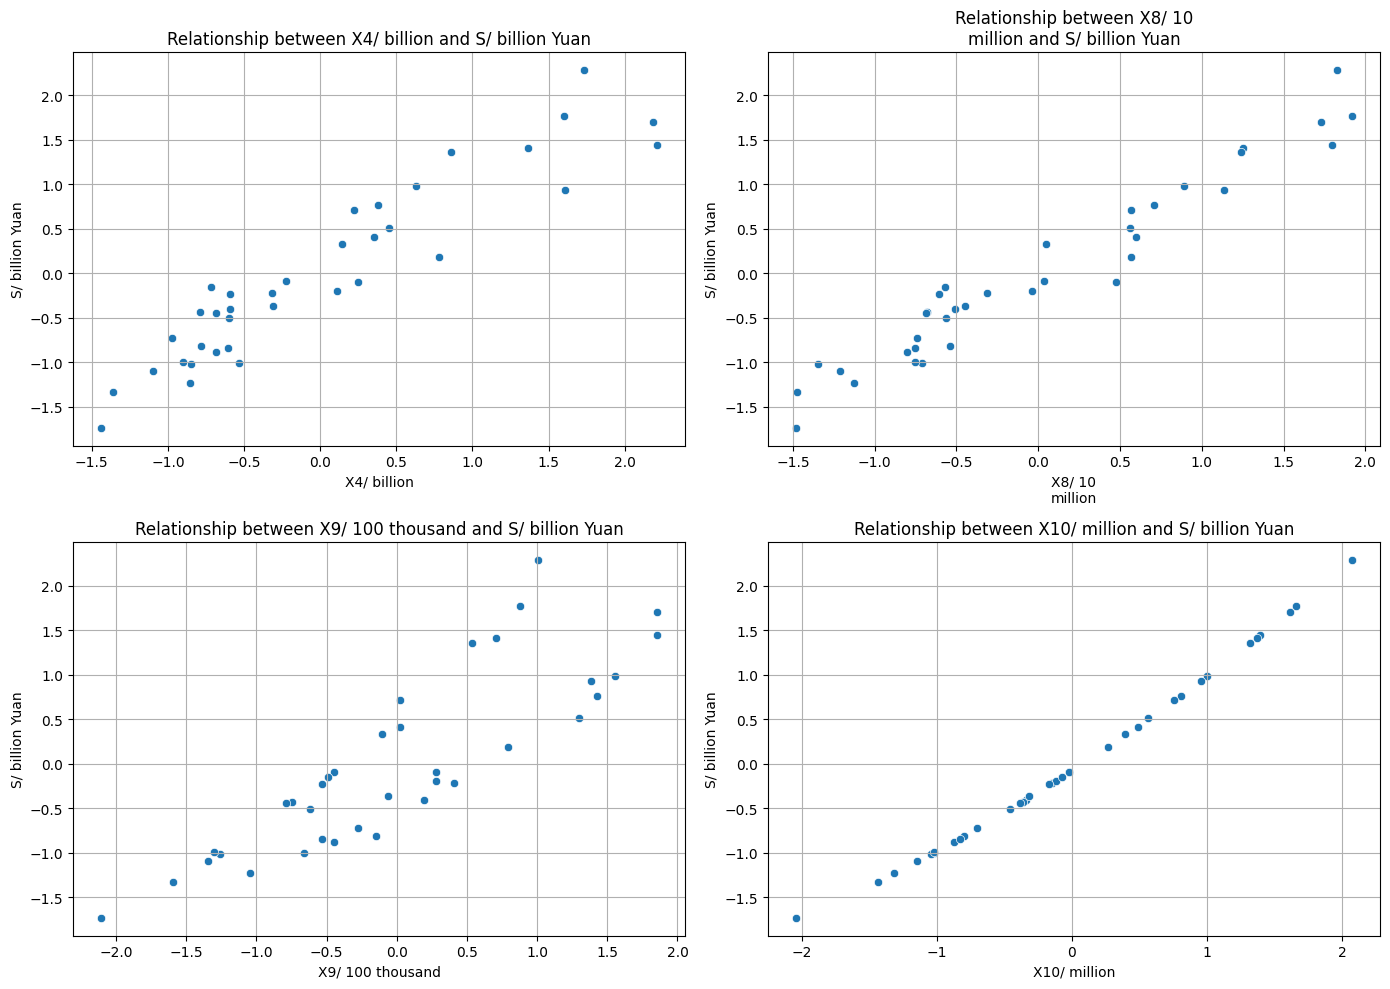

In [781]:
def visualize_relationship(dataframe, target_col):

    numeric_cols = dataframe.select_dtypes(include=[np.number]).drop(columns=[target_col], errors='ignore')

    num_plots = len(numeric_cols.columns)
    ncols = 2
    nrows = (num_plots + ncols - 1) // ncols


    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 10))


    axes = axes.flatten()


    for i, col in enumerate(numeric_cols.columns):
        ax = axes[i]
        sns.scatterplot(x=dataframe[col], y=dataframe[target_col], ax=ax)
        ax.set_title(f'Relationship between {col} and {target_col}')
        ax.set_xlabel(col)
        ax.set_ylabel(target_col)
        ax.grid(True)


    for j in range(num_plots, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


visualize_relationship(df_dress_standardized, target_col='S/ billion Yuan')

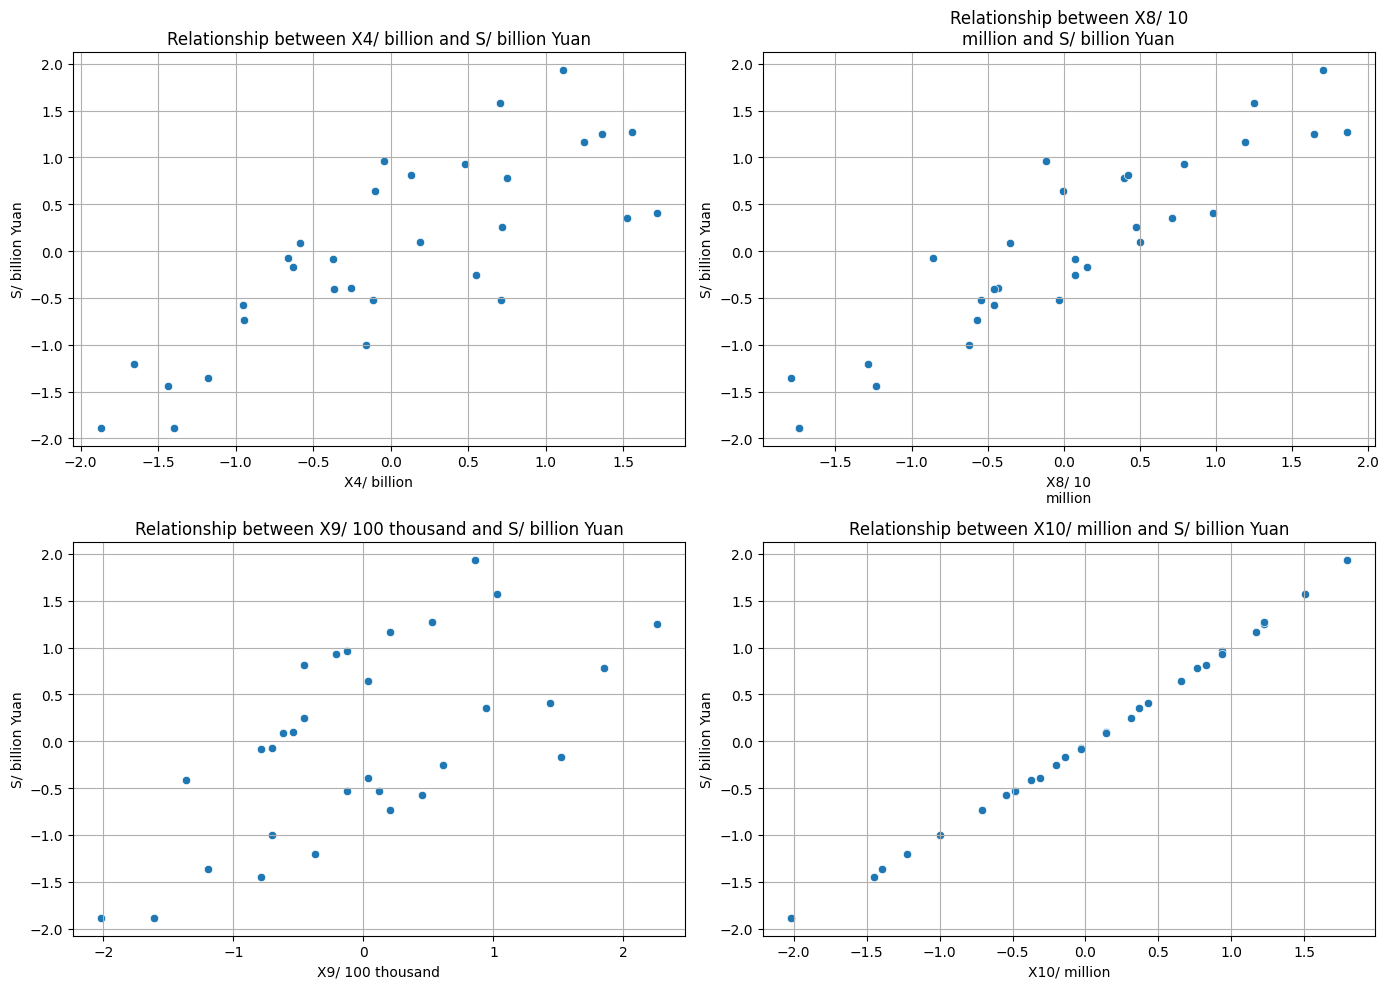

In [782]:
visualize_relationship(df_pants_standardized, target_col='S/ billion Yuan')

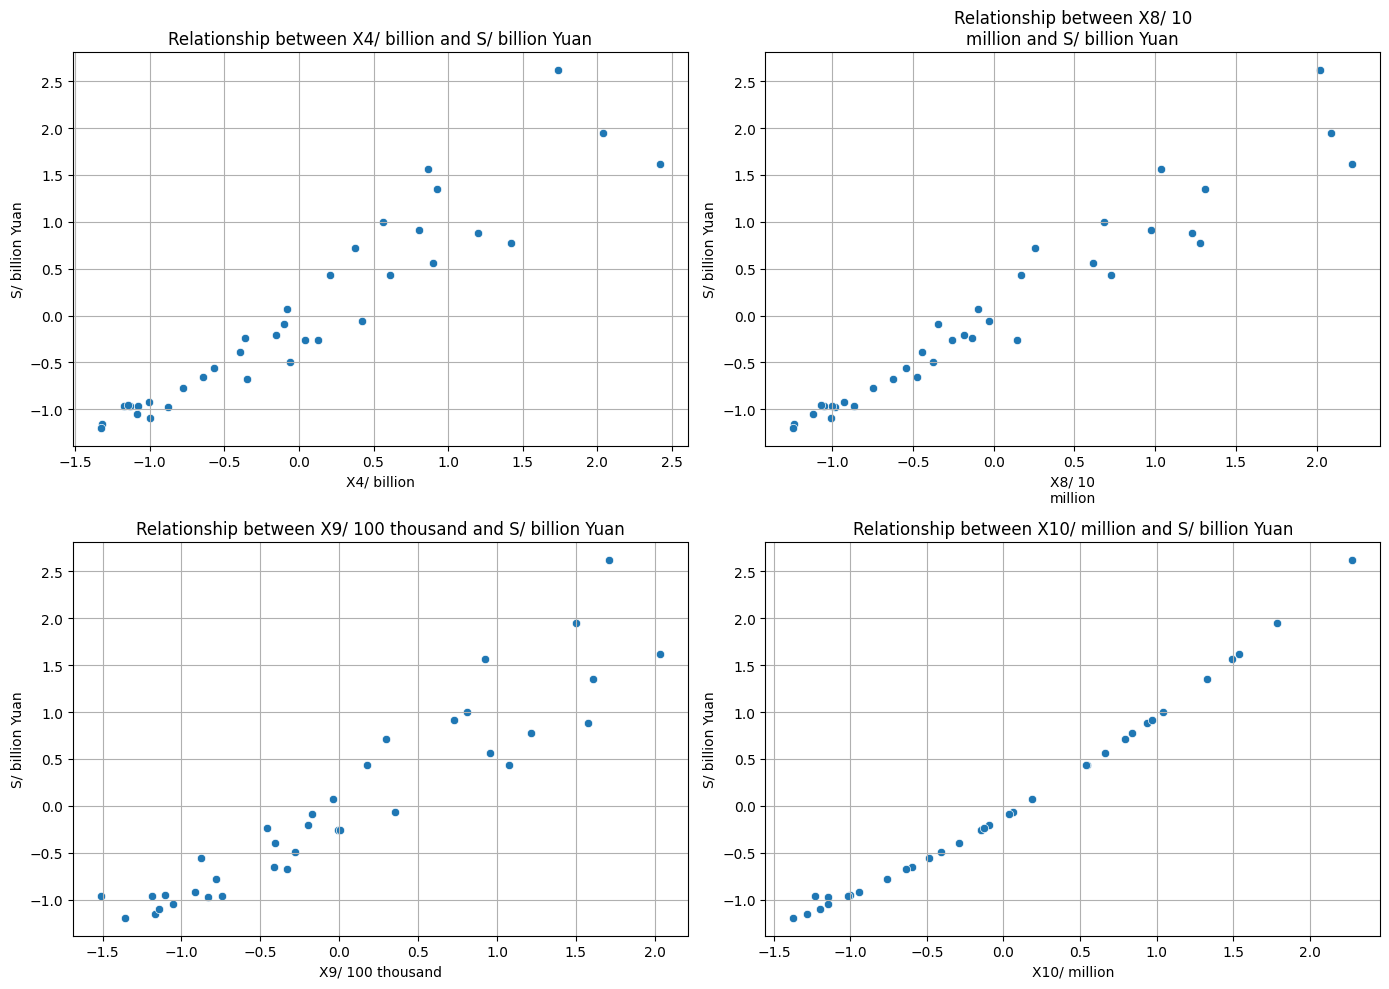

In [783]:
visualize_relationship(df_sweater_standardized, target_col='S/ billion Yuan')

In [784]:
def pearson_correlation(x, y):
    x = np.array(x)
    y = np.array(y)
    

    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    numerator = np.sum((x - x_mean) * (y - y_mean))
    
    denominator = np.sqrt(np.sum((x - x_mean) ** 2) * np.sum((y - y_mean) ** 2))
    

    if denominator == 0:
        return 0
    
    return numerator / denominator


def calculate_correlation(df, target_col):
    numeric_cols = df.select_dtypes(include=[np.number]).drop(columns=[target_col], errors='ignore')
    
    correlations = {}
    
    for col in numeric_cols.columns:
        correlation = pearson_correlation(df[col], df[target_col])
        correlations[col] = correlation
    
    correlation_df = pd.DataFrame(list(correlations.items()), columns=['Column', 'Correlation'])
    
    correlation_df['Abs_Correlation'] = correlation_df['Correlation'].abs()
    correlation_df = correlation_df.sort_values(by='Abs_Correlation', ascending=False).drop(columns=['Abs_Correlation'])
    
    return correlation_df
        

In [785]:
calculate_correlation(df_dress_sales, 'S/ billion Yuan')

,Column,Correlation
3,X10/ million,0.996222
1,X8/ 10\nmillion,0.971121
0,X4/ billion,0.937870
2,X9/ 100 thousand,0.858903


In [786]:
calculate_correlation(df_pants_sales, 'S/ billion Yuan')

,Column,Correlation
3,X10/ million,0.998352
1,X8/ 10\nmillion,0.916305
0,X4/ billion,0.801243
2,X9/ 100 thousand,0.636353


In [787]:
calculate_correlation(df_sweater_sales, 'S/ billion Yuan')

,Column,Correlation
3,X10/ million,0.992755
1,X8/ 10\nmillion,0.967848
0,X4/ billion,0.940921
2,X9/ 100 thousand,0.937245


In [788]:
def test_hypothese(ech1, ech2, alpha = 0.5):
    print("H0 : μ1 et μ2 ne sont pas significativement différentes")
    print("H1 : μ1 et μ2 sont significativement différentes")
    m1 = np.mean(ech1)
    m2 = np.mean(ech2)
    n1 = len(ech1)
    n2 = len(ech2)
    std1 = np.sqrt(n1/(n1-1))*np.std(ech1)
    std2 = np.sqrt(n2/(n2-1))*np.std(ech2)
    t = (m1 - m2)/(np.sqrt(((std1 ** 2)/n1)+((std2 ** 2)/n2)))
    t_alpha = norm.ppf(1 - alpha/2)
    print(t)
    print(t_alpha)
    if (abs(t)>t_alpha):
        print("on rejete H0")
    else :
        print("on ne rejete pas H0")

In [789]:
test_hypothese(df_sweater_sales['S/ billion Yuan'], df_dress_sales['S/ billion Yuan'])

H0 : μ1 et μ2 ne sont pas significativement différentes
H1 : μ1 et μ2 sont significativement différentes
-7.964285579458468
0.6744897501960817
on rejete H0


In [790]:
test_hypothese(df_sweater_sales['S/ billion Yuan'], df_pants_sales['S/ billion Yuan'])

H0 : μ1 et μ2 ne sont pas significativement différentes
H1 : μ1 et μ2 sont significativement différentes
-5.754811989459045
0.6744897501960817
on rejete H0


In [791]:
test_hypothese(df_dress_sales['S/ billion Yuan'], df_pants_sales['S/ billion Yuan'])

H0 : μ1 et μ2 ne sont pas significativement différentes
H1 : μ1 et μ2 sont significativement différentes
4.89288560865531
0.6744897501960817
on rejete H0


In [792]:
def pca_manual(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean

    covariance_matrix = np.cov(centered_data, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

    return centered_data, eigenvectors, explained_variance_ratio, eigenvalues

def kaiser_rule(eigenvalues):
    num_components = np.sum(eigenvalues > 1)
    return num_components

def project_data(centered_data, eigenvectors, num_components):
    selected_vectors = eigenvectors[:, :num_components]
    projections = np.dot(centered_data, selected_vectors)
    return projections
    
numeric_cols = df_pants_sales.select_dtypes(include=[np.number]).drop(columns=['S/ billion Yuan'])
data = np.array(numeric_cols)

centered_data, eigenvectors, explained_variance_ratio, eigenvalues = pca_manual(data)

num_components = kaiser_rule(eigenvalues)
print(f"Nombre de composantes principales sélectionnées (règle de Kaiser) : {num_components}")


projections = project_data(centered_data, eigenvectors, num_components)


cumulative_variance = np.cumsum(explained_variance_ratio)
summary_table = pd.DataFrame({
    'Axis': [f"PC{i+1}" for i in range(len(eigenvalues))],
    'Eigenvalues': eigenvalues,
    '% Eigenvalues': explained_variance_ratio * 100,
    '% Cumulative': cumulative_variance * 100
})



Nombre de composantes principales sélectionnées (règle de Kaiser) : 1


In [793]:
summary_table

,Axis,Eigenvalues,% Eigenvalues,% Cumulative
0,PC1,1.406970,97.172635,97.172635
1,PC2,0.030144,2.081921,99.254555
2,PC3,0.007105,0.490740,99.745295
3,PC4,0.003688,0.254705,100.000000


In [794]:
projections_pc1 = projections[:, 0]


df_final_pants_sales = pd.DataFrame(projections_pc1, columns=['PC1'])
df_final_pants_sales['S/ billion Yuan'] = df_pants_sales['S/ billion Yuan']


df_final_pants_sales.head()

,PC1,S/ billion Yuan
0,-1.071507,2.23
1,-1.079518,2.14
2,-1.697149,1.72
3,-2.235420,1.46
4,-1.931039,1.86


In [795]:
numeric_cols = df_dress_sales.select_dtypes(include=[np.number]).drop(columns=['S/ billion Yuan'])
data = np.array(numeric_cols)

centered_data, eigenvectors, explained_variance_ratio, eigenvalues = pca_manual(data)

num_components = kaiser_rule(eigenvalues)
print(f"Nombre de composantes principales sélectionnées (règle de Kaiser) : {num_components}")


projections = project_data(centered_data, eigenvectors, num_components)


cumulative_variance = np.cumsum(explained_variance_ratio)
summary_table = pd.DataFrame({
    'Axis': [f"PC{i+1}" for i in range(len(eigenvalues))],
    'Eigenvalues': eigenvalues,
    '% Eigenvalues': explained_variance_ratio * 100,
    '% Cumulative': cumulative_variance * 100
})


Nombre de composantes principales sélectionnées (règle de Kaiser) : 1


In [796]:
summary_table

,Axis,Eigenvalues,% Eigenvalues,% Cumulative
0,PC1,19.338329,99.569583,99.569583
1,PC2,0.064569,0.332452,99.902035
2,PC3,0.010950,0.056379,99.958415
3,PC4,0.008077,0.041585,100.000000


In [797]:
projections_pc1 = projections[:, 0]


df_final_dress_sales = pd.DataFrame(projections_pc1, columns=['PC1'])
df_final_dress_sales['S/ billion Yuan'] = df_dress_sales['S/ billion Yuan']


df_final_dress_sales.head()

,PC1,S/ billion Yuan
0,-1.760377,5.29
1,-2.847238,5.66
2,-2.031795,4.87
3,1.377938,3.66
4,2.565095,3.35


In [798]:
numeric_cols = df_sweater_sales.select_dtypes(include=[np.number]).drop(columns=['S/ billion Yuan'])
data = np.array(numeric_cols)

centered_data, eigenvectors, explained_variance_ratio, eigenvalues = pca_manual(data)

num_components = kaiser_rule(eigenvalues)
print(f"Nombre de composantes principales sélectionnées (règle de Kaiser) : {num_components}")


projections = project_data(centered_data, eigenvectors, num_components)


cumulative_variance = np.cumsum(explained_variance_ratio)
summary_table = pd.DataFrame({
    'Axis': [f"PC{i+1}" for i in range(len(eigenvalues))],
    'Eigenvalues': eigenvalues,
    '% Eigenvalues': explained_variance_ratio * 100,
    '% Cumulative': cumulative_variance * 100
})

Nombre de composantes principales sélectionnées (règle de Kaiser) : 1


In [799]:
summary_table

,Axis,Eigenvalues,% Eigenvalues,% Cumulative
0,PC1,41.417428,98.179071,98.179071
1,PC2,0.505473,1.198212,99.377283
2,PC3,0.203349,0.482033,99.859317
3,PC4,0.059348,0.140683,100.000000


In [800]:
projections_pc1 = projections[:, 0]


df_final_sweater_sales = pd.DataFrame(projections_pc1, columns=['PC1'])
df_final_sweater_sales['S/ billion Yuan'] = df_sweater_sales['S/ billion Yuan']


df_final_sweater_sales.head()

,PC1,S/ billion Yuan
0,-6.627139,0.63
1,-8.108507,0.46
2,-8.368150,0.42
3,-3.304118,0.91
4,4.576163,1.90


In [801]:
projections_pc1 = projections[:, 0]


df_final_sweater_sales = pd.DataFrame(projections_pc1, columns=['PC1'])
df_final_sweater_sales['S/ billion Yuan'] = df_sweater_sales['S/ billion Yuan']


df_final_sweater_sales.head()

,PC1,S/ billion Yuan
0,-6.627139,0.63
1,-8.108507,0.46
2,-8.368150,0.42
3,-3.304118,0.91
4,4.576163,1.90


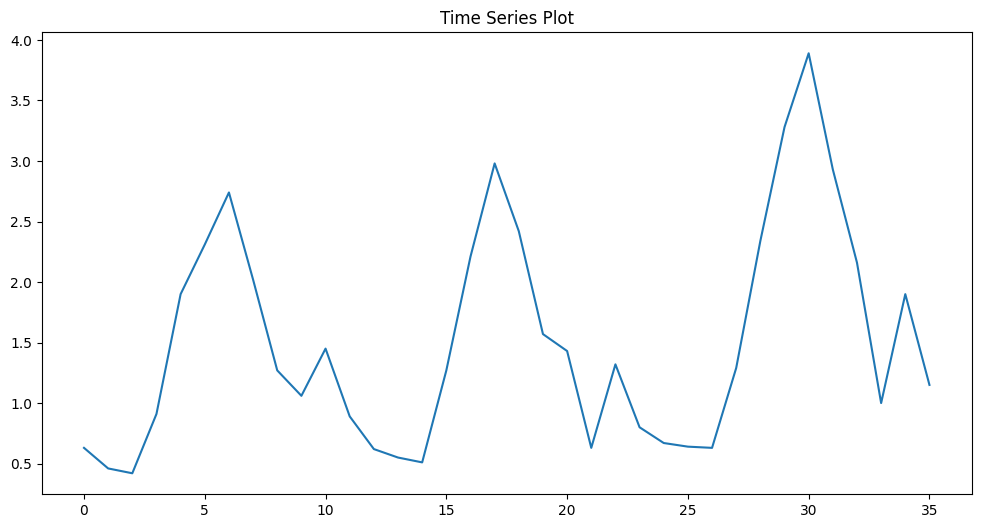

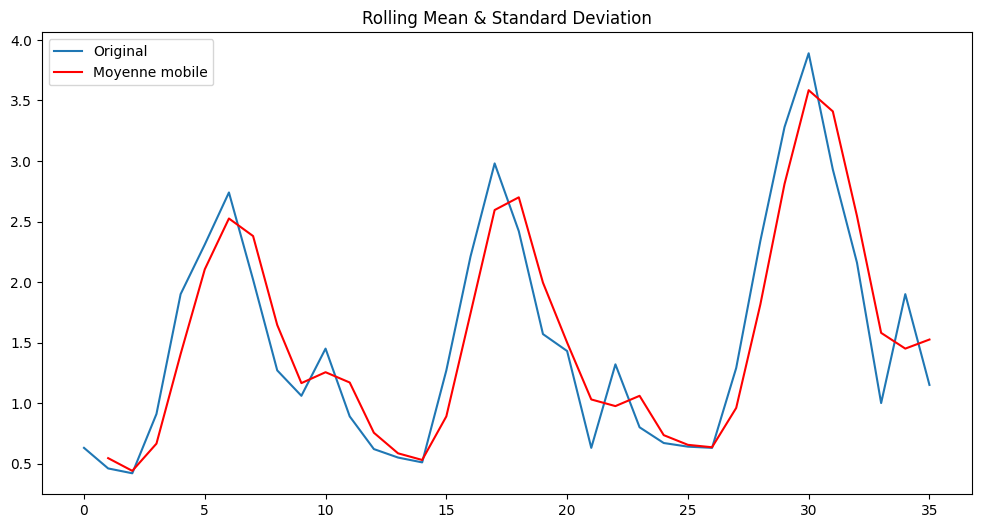

In [802]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

df_sweater_sales['S/ billion Yuan'].plot()
plt.title("Time Series Plot")
plt.show()

plt.figure(figsize=(12, 6))

rolling_mean = df_sweater_sales['S/ billion Yuan'].rolling(window=2).mean()

plt.plot(df_sweater_sales['S/ billion Yuan'], label='Original')
plt.plot(rolling_mean, label='Moyenne mobile', color='red')
plt.legend(loc='best')
plt.title("Rolling Mean & Standard Deviation")
plt.show()


[np.float64(1.0), np.float64(0.749618516261895), np.float64(0.35234030967737967), np.float64(-0.13044109010941354), np.float64(-0.41817239304535264), np.float64(-0.5067655043644266), np.float64(-0.47761417122046007), np.float64(-0.3985479147199184), np.float64(-0.3169913311661191), np.float64(-0.13415201718321185), np.float64(0.19964841697083915)]


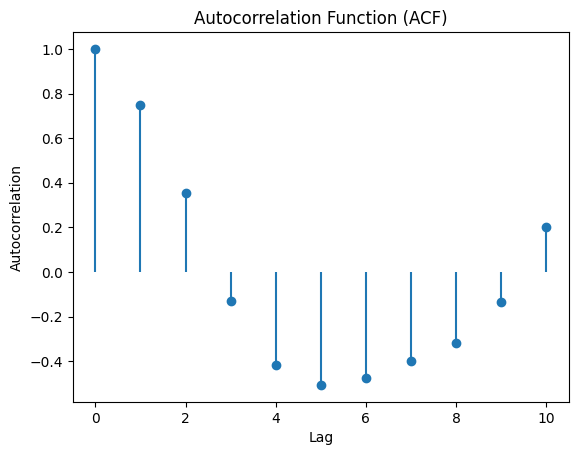

In [803]:
import matplotlib.pyplot as plt
import numpy as np

def compute_acf(data, nlags):

    data = np.array(data)
    n = len(data)
    mean = np.mean(data)
    var = np.var(data)
    
    acf_values = []
    for k in range(nlags + 1):
        numerator = np.sum((data[:n-k] - mean) * (data[k:] - mean))

        denominator = var * (n - k)

        acf_values.append(numerator / denominator)
    
    return acf_values


nlags = 10

acf_values = compute_acf(df_sweater_sales['S/ billion Yuan'], nlags=nlags)

print(acf_values)

# Plot ACF
plt.stem(range(len(acf_values)), acf_values, basefmt=" ")
plt.title("Autocorrelation Function (ACF)")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()
